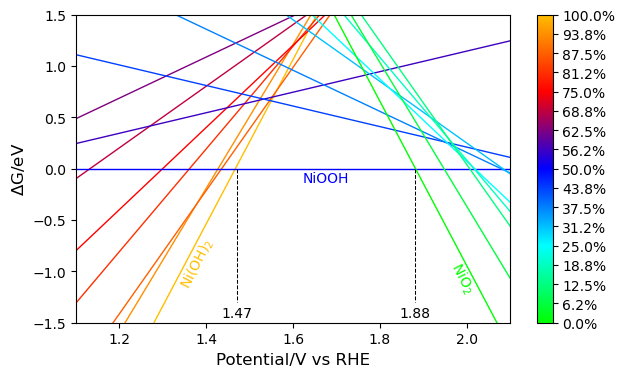

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Colors
nb_col=255
colors = np.array([
    [1, 0, 0],
    [1, 0.75, 0],
    [0, 1, 0],
    [0, 1, 1],
    [0, 0, 1]
])
colors = np.array([
    [0, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0.75, 0]
])
gradient_colors = np.vstack((
    np.linspace(colors[0], colors[1], nb_col+1),
    np.linspace(colors[1], colors[2], nb_col),
    np.linspace(colors[2], colors[3], nb_col),
    np.linspace(colors[3], colors[4], nb_col)
))

# Parameters
x1 = 1.1
x2 = 2.1
s1, s2 = 7, 4
x = np.linspace(x1, x2, 500)
plt.figure(figsize=(s1, s2))

# Functions
def chef(x, E, coef):
    return E + coef * (Eh2 / 2 - x)

# Initialize lists
Eh2 = -6.77142417-0.047446 # P=0.986923 atm / T=300K
Eche = [ -205.60154833, -200.00133675, -194.91137638, -189.41522903, -184.23396634, -178.57732658, -173.30096688,
        -168.73604193, -164.23047332, -158.38112587, -152.72155541, -147.02104226, -141.57504781, -135.88016655,
        -130.25883613, -125.03035815, -119.98153341 ]
Eu = [ 6.007250, 5.562490, 5.260127, 4.978761, 4.816120, 4.370593, 4.187634, 3.889767, 3.648255,
    3.418874, 3.117218, 2.918204, 2.704921, 2.430438, 2.175611, 1.949621, 1.733023 ]
for i in range(len(Eche)):
    Eche[i] = Eche[i] + Eu[i]
yche = []

# Plot functions
for i in range(len(Eche)):
    yche.append(chef(x, Eche[i], i))
    yche[i] = yche[i]
    
# Plot curves
for i in range(len(yche)):
    i_grad=int(nb_col/4*(16-i))
    plt.plot(x, (yche[i]-yche[8]), linewidth=1, c=gradient_colors[i_grad], linestyle='-')
    if i == 0 :
        col0 = gradient_colors[i_grad]
    if i == 8 :
        col50 = gradient_colors[i_grad]
    if i == 16 :
        col100 = gradient_colors[i_grad]

# Color Bar
cmap = mcolors.ListedColormap(gradient_colors)
cbar = plt.colorbar(ScalarMappable(cmap=cmap), ax=plt.gca(), orientation='vertical')
cbar.set_ticks(np.linspace(0, 1, 17))
cbar.set_ticklabels([f"{i * 6.25:.1f}%" for i in range(17)])

# Intersection
for j in range(len(yche[-1])):
    try:
        if abs(yche[0][j] - yche[8][j]) < 0.008:
            Eox1=float(f"{x[j]:.2f}")
    except:
        pass
for j in range(len(yche[-1])):
    try:
        if abs(yche[-1][j] - yche[8][j]) < 0.008:
            Eox2=float(f"{x[j]:.2f}")
    except:
        pass
plt.text(Eox1, -1.45, Eox1, horizontalalignment='center', fontsize=10, c='black')
plt.plot([Eox1, Eox1], [0, -1.3], linestyle='--', c='black', linewidth=0.75)
plt.text(Eox2, -1.45, Eox2, horizontalalignment='center', fontsize=10, c='black')
plt.plot([Eox2, Eox2], [0, -1.3], linestyle='--', c='black', linewidth=0.75)
plt.text((1.29+Eox1)/2, -1.15, 'Ni(OH)$_2$', horizontalalignment='center', fontsize=10, c=col0,rotation=63)
plt.text((Eox1+Eox2)/2, -0.13, 'NiOOH', horizontalalignment='center', fontsize=10, c=col50)
plt.text((Eox2+2.1)/2, -1.2, 'NiO$_2$', horizontalalignment='center', fontsize=10, c=col100,rotation=-63)

# Plot settings
plt.xlim(x1, x2)
plt.ylim(-1.5, 1.5)
plt.xlabel('Potential/V vs RHE', fontsize=12)
plt.ylabel('$\Delta$G/eV', fontsize=12)
plt.savefig('/Users/termacor/Downloads/fig.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

